In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df = pd.read_csv('lyrics.csv')
df.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [3]:
df.shape

(362237, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 6 columns):
index     362237 non-null int64
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(2), object(4)
memory usage: 16.6+ MB


In [5]:
df.describe()

,index,year
count,362237.000000,362237.000000
mean,181118.000000,2008.537596
std,104568.959068,9.908024
min,0.000000,67.000000
25%,90559.000000,2006.000000
50%,181118.000000,2008.000000
75%,271677.000000,2014.000000
max,362236.000000,2038.000000


In [6]:
df = df.replace({'\n': ' '}, regex=True)
df = df.dropna()

beatles = df.loc[df['artist'] == 'beatles']
beach_boys = df.loc[df['artist'] == 'beach-boys']

bbb = [beatles, beach_boys]
bbb_songs = pd.concat(bbb)
bbb_songs.head()

,index,song,year,artist,genre,lyrics
149250,149250,michelle,2009,beatles,Rock,"Michelle, ma belle These are words that go tog..."
149251,149251,what-goes-on-girl,2009,beatles,Rock,I've got a word or two To say about the things...
149252,149252,run-for-your-life,2009,beatles,Rock,"Well I'd rather see you dead, little girl Than..."
149253,149253,if-i-needed-someone,2009,beatles,Rock,If I needed someone to love You're the one tha...
149254,149254,you-won-t-see-me,2009,beatles,Rock,When I call you up your line's engaged. I have...


In [7]:
bbb_songs['word_count'] = bbb_songs['lyrics'].str.split().str.len()
bbb_songs['text_length'] = bbb_songs['lyrics'].apply(len)
bbb_songs = bbb_songs[bbb_songs['word_count'] !=1]

bbb_songs.head()

,index,song,year,artist,genre,lyrics,word_count,text_length
149250,149250,michelle,2009,beatles,Rock,"Michelle, ma belle These are words that go tog...",163,789
149251,149251,what-goes-on-girl,2009,beatles,Rock,I've got a word or two To say about the things...,405,1876
149252,149252,run-for-your-life,2009,beatles,Rock,"Well I'd rather see you dead, little girl Than...",233,1142
149253,149253,if-i-needed-someone,2009,beatles,Rock,If I needed someone to love You're the one tha...,129,578
149254,149254,you-won-t-see-me,2009,beatles,Rock,When I call you up your line's engaged. I have...,205,964


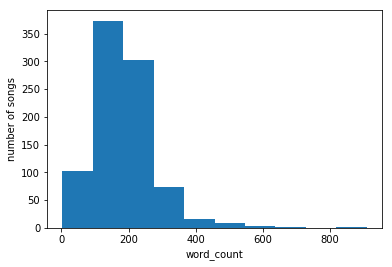

In [8]:
_ = plt.hist(bbb_songs.word_count)
_ = plt.xlabel('word_count')
_ = plt.ylabel('number of songs')

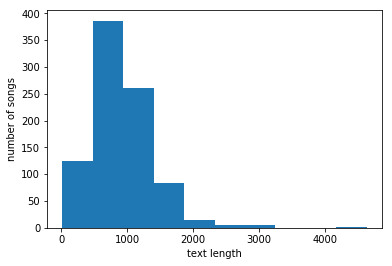

In [9]:
_ = plt.hist(bbb_songs.text_length)
_ = plt.xlabel('text length')
_ = plt.ylabel('number of songs')

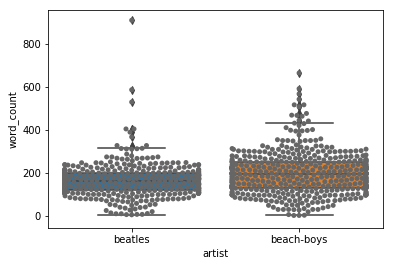

In [10]:
_ = sns.swarmplot(x=bbb_songs['artist'] , y=bbb_songs['word_count'], color='.4')
_ = sns.boxplot(x=bbb_songs['artist'] , y=bbb_songs['word_count'])

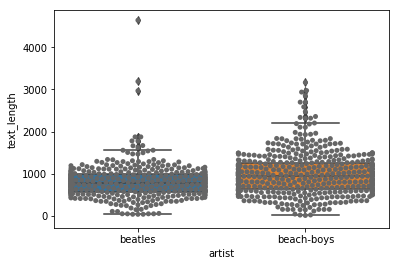

In [11]:
_ = sns.swarmplot(x=bbb_songs['artist'] , y=bbb_songs['text_length'], color='.4')
_ = sns.boxplot(x=bbb_songs['artist'] , y=bbb_songs['text_length'])

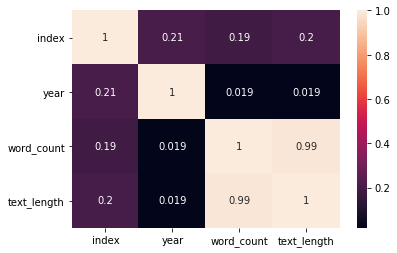

In [12]:
sns.heatmap(data=bbb_songs.corr(), annot=True)

In [13]:
X = bbb_songs['lyrics']
y = bbb_songs['artist']

In [14]:
import string
from nltk.corpus import stopwords

def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [16]:
len(bow_transformer.vocabulary_)

7561

In [17]:
X[149253]

"If I needed someone to love You're the one that I'd be thinking of If I needed someone If I had some more time to spend Then I guess I'd be with you my friend If I needed someone Had you come some other day Then it might not have been like this But you see now I'm too much in love Carve your number on my wall And maybe you will get a call from me If I needed someone Ah, ah, ah, ah If I had some more time to spend Then I guess I'd be with you my friend If I needed someone Had you come some other day Then it might not have been like this But you see now I'm too much in love"

In [18]:
X = bow_transformer.transform(X)

In [19]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of non-zero ocurrences: ', X.nnz)

density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: ', density)

Shape of Sparse Matrix:  (880, 7561)
Amount of non-zero ocurrences:  42953
Density:  0.6455525363407919


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
preds = nb.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[106  41]
 [  9 108]]


             precision    recall  f1-score   support

 beach-boys       0.92      0.72      0.81       147
    beatles       0.72      0.92      0.81       117

avg / total       0.83      0.81      0.81       264



In [25]:
beatles_song = bbb_songs['lyrics'][149250]
beatles_song

"Michelle, ma belle These are words that go together well My Michelle Michelle, ma belle Sont les mots qui vont tres bien ensemble Tres bien ensemble I love you, I love you, I love you That's all I want to say Until I find a way I will say the only words I know that you'll understand Michelle, ma belle Sont les mots qui vont tres bien ensemble Tres bien ensemble I need to, I need to, I need to I need to make you see Oh, what you mean to me Until I do, I'm hoping you will know what I mean I love you... I want you, I want you, I want you I think you know by now I'll get to you somehow Until I do, I'm telling you so you'll understand Michelle, ma belle Sont les mots qui vont tres bien ensemble Tres bien ensemble And I will say the only words I know that you'll understand My Michelle"

In [26]:
beatles_song_transformed = bow_transformer.transform([beatles_song])

nb.predict(beatles_song_transformed)[0]

'beatles'

### Logistic Regression

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [29]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring='accuracy')
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.778


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[113  28]
 [ 32  91]]


In [31]:
print('Features: ', X.shape[1])
print('Accuracy: ', cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean())

Features:  7561
Accuracy:  0.7738636363636364


### KNN

In [32]:
import sklearn
from sklearn import preprocessing, cross_validation, neighbors
from sklearn.model_selection import cross_val_score

In [33]:
knn = neighbors.KNeighborsClassifier(n_neighbors=250)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=250, p=2,
           weights='uniform')

In [34]:
knn_w = neighbors.KNeighborsClassifier(n_neighbors=250, weights='distance')
knn_w.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=250, p=2,
           weights='distance')

In [35]:
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.54 (+/- 0.09)
Weighted Accuracy: 0.65 (+/- 0.09)


### Random Forest

In [36]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
results = cross_val_score(rfc, X, y, cv=10)
print(results)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

[0.73863636 0.80681818 0.81818182 0.86363636 0.75       0.75
 0.72727273 0.71590909 0.73863636 0.75      ]
10-fold cross validation average accuracy: 0.766
